Packages

In [34]:
import numpy as np
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense, Conv2D, Dropout, BatchNormalization, Activation, MaxPooling2D
from keras import optimizers, regularizers
from keras.applications import VGG16

Loading Data

In [35]:
train_path = './data/train'
test_path = './data/test'
hot_dog_path = './data/train/hot_dog'
not_hot_dog_path = './data/train/not_hot_dog'

Initialization

In [36]:
img_size = 150 #224
num_classes = 2 # hot dog or not hot dog

data_generator = ImageDataGenerator(rescale=1./255,
                                rotation_range=90,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                horizontal_flip=True,
                                shear_range=0.2,
                                zoom_range=0.2)

test_generator = ImageDataGenerator(rescale=1./255)

train_generator = data_generator.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=498, #498
    class_mode='binary') #categorical

validation_generator = test_generator.flow_from_directory(
    test_path,
    target_size=(img_size, img_size),
    batch_size=500, #500
    class_mode='binary') #categorical

Found 498 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Model

In [42]:
conv_base = VGG16(weights='imagenet',
                        include_top=False,
                        input_shape=(img_size, img_size, 3))
conv_base.trainable = False

model = Sequential()
model.add(conv_base)
model.add(Flatten())
#model.add(Dropout(0.7))
#model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 8193      
Total params: 14,722,881
Trainable params: 8,193
Non-trainable params: 14,714,688
_________________________________________________________________


In [47]:
#LEARNING RATE
learning_rate = 1E-4
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['accuracy'])

input_x = (train_generator[0][0])
input_y = (train_generator[0][1])

history = model.fit(input_x,
          input_y,
          batch_size=32,
          #validation_split=0.2,
          epochs=10)

Epoch 1/10
498/498 [==============================] - 54s 108ms/step - loss: 0.6068 - acc: 0.6888
Epoch 2/10
498/498 [==============================] - 64s 129ms/step - loss: 0.5845 - acc: 0.7149
Epoch 3/10
498/498 [==============================] - 67s 134ms/step - loss: 0.5692 - acc: 0.7289
Epoch 4/10
498/498 [==============================] - 61s 121ms/step - loss: 0.5537 - acc: 0.7510
Epoch 5/10
498/498 [==============================] - 63s 126ms/step - loss: 0.5428 - acc: 0.7590
Epoch 6/10
498/498 [==============================] - 65s 130ms/step - loss: 0.5312 - acc: 0.7751
Epoch 7/10
498/498 [==============================] - 60s 121ms/step - loss: 0.5210 - acc: 0.7731
Epoch 8/10
498/498 [==============================] - 58s 116ms/step - loss: 0.5081 - acc: 0.7851
Epoch 9/10
498/498 [==============================] - 60s 120ms/step - loss: 0.4985 - acc: 0.8092
Epoch 10/10
498/498 [==============================] - 60s 121ms/step - loss: 0.4877 - acc: 0.8233


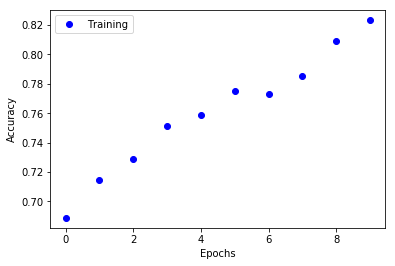

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
#val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training')
#plt.plot(epochs, val_acc, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

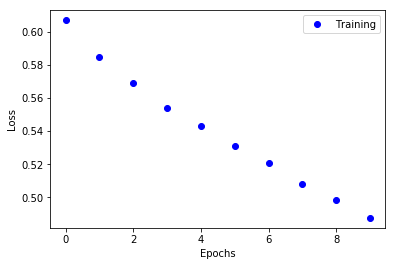

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

l1 = history.history['loss']
#l2 = history.history['val_loss']

epochs = range(len(l1))

plt.plot(epochs, l1, 'bo', label='Training')
#plt.plot(epochs, l2, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
output_x = (validation_generator[0][0])
output_y = validation_generator[0][1]

loss_and_acc = model.evaluate(output_x, output_y)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

500/500 [==============================] - 57s 115ms/step
loss = 0.5086924624443054
accuracy = 0.76
